# Test With Only Infinity Ridges

In [ ]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

# Create a sample dataset with 10 samples
np.random.seed(0)

In [2]:
aabbox = np.array([
    [-1.0, 1.0],
    [-1.0, 1.0]
])

In [3]:
points = np.array([
    [-0.5, 0.5],
    [0.5, 0.5],
    [-0.5, -0.5],
    [0.5, -0.5]
])

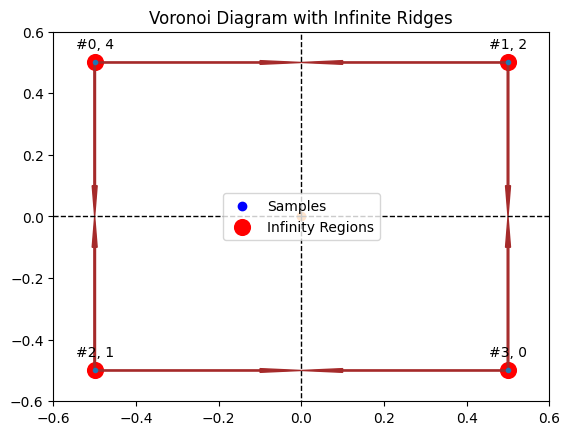

In [4]:
vor = Voronoi(points)

[point_idx_region_mapping, region_idx_point_idx_mapping, regions_with_infinity_edges, 
 region_idx_neighboring_regions_indices_mapping, 
 region_idx_ridge_indices_mapping] = identify_infinity_regions_and_neighbors(vor)

import matplotlib.patches as patches

plt.close()
fig = voronoi_plot_2d(vor)

ax = fig.gca()

ax.scatter(points[:, 0], points[:, 1], c="blue", label="Samples")

points_with_infinity_edges = points[[region_idx_point_idx_mapping[region_idx] for region_idx in regions_with_infinity_edges]]
ax.scatter(points_with_infinity_edges[:, 0], points_with_infinity_edges[:, 1], c="red", label="Infinity Regions", s=2**7)

for point_idx, point in enumerate(points):
    region_idx = point_idx_region_mapping[point_idx]

    ax.annotate(f"#{point_idx}, {region_idx}", xy=point, textcoords='offset points', xytext=(0,10), ha='center')

# draw arrows to neighbors
for point_idx, point in enumerate(points):
    region_idx = point_idx_region_mapping[point_idx]

    for neighbor_region_idx in region_idx_neighboring_regions_indices_mapping[region_idx]:
        neighbor_point_idx = region_idx_point_idx_mapping[neighbor_region_idx]
        neighbor_point = points[neighbor_point_idx]

        midpoint = point + (neighbor_point - point) / 2.0

        # Draw arrow from current point to neighbor point
        arrow = patches.Arrow(point[0], point[1], midpoint[0] - point[0], midpoint[1] - point[1], 
                              width=0.02, color="brown", linestyle="-")
        ax.add_patch(arrow)

plt.legend()
plt.title('Voronoi Diagram with Infinite Ridges')
plt.show()

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:308: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


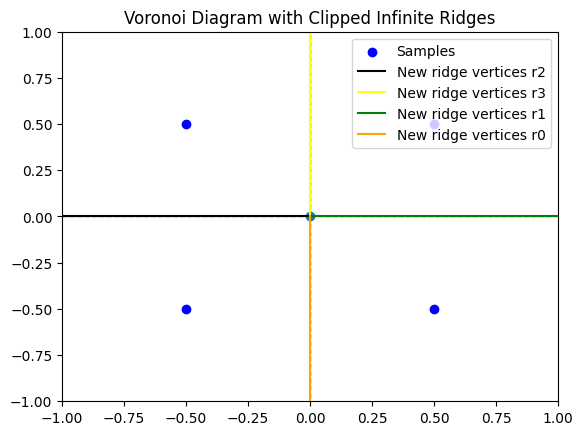

In [5]:
clip_equations = construct_halfspace_definition_for_aabbox(aabbox)

new_vertices_and_ridge_indices = [clip_ridges_of_voronoi_region(
    regions_with_infinity_edges[i], vor, clip_equations, region_idx_point_idx_mapping, 
    region_idx_ridge_indices_mapping)[1]
    for i in range(len(regions_with_infinity_edges))]

# combine them
ridge_indices = []
new_vertices = []

for vertices_, ridge_indices_ in new_vertices_and_ridge_indices:
    for vertices, ridge_index in zip(vertices_, ridge_indices_):
        if ridge_index not in ridge_indices:
            ridge_indices.append(ridge_index)
            new_vertices.append(vertices)

plt.close()
fig = plt.figure()
ax = fig.gca()
ax.scatter(points[:, 0], points[:, 1], c='blue', label='Samples')

voronoi_plot_2d(vor, show_vertices=True, show_points=False, line_colors="green", ax=ax)

color = ["black", "yellow", "green", "orange", "purple", "gray"]

for i, [vertices, ridge_index] in enumerate(zip(new_vertices, ridge_indices)):
    ax.plot(vertices[:, 0], vertices[:, 1], c=color[i], label=f"New ridge vertices r{ridge_index}") # , s=2**7)

ax.set_xlim(aabbox[0])
ax.set_ylim(aabbox[1])

plt.legend()
plt.title('Voronoi Diagram with Clipped Infinite Ridges')
plt.show()